In [3]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
df = pd.read_csv("final_anime_dataset.csv")
df.head()

,Serial No.,Name,Links,Genre and Theme,No. of episodes,TV show,Genre: magic,Genre: adventure,Genre: psychological,Genre: comedy,Genre: drama,Genre: romance,Genre: mystery,Genre: action,Genre: fantasy,Rating
0,1,Fullmetal Alchemist: Brotherhood (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,fantasy,thriller,alchem...",64,1,0,1,0,1,1,0,0,0,1,9.09
1,2,Steins;Gate (TV),https://www.animenewsnetwork.com//encyclopedia...,"adventure,comedy,drama,mystery,psychological,r...",24,1,0,1,1,1,1,1,1,0,0,9.04
2,3,Clannad After Story (TV),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,psychological,romance,supernatura...",25,1,0,0,1,1,1,1,0,0,0,9.04
3,4,your name. (movie),https://www.animenewsnetwork.com//encyclopedia...,"comedy,drama,romance,supernatural,amnesia,body...",1,0,0,0,0,1,1,1,0,0,0,9.02
4,5,Rurouni Kenshin: Trust &amp; Betrayal (OAV),https://www.animenewsnetwork.com//encyclopedia...,"action,drama,romance,historical,revenge,samura...",4,1,0,0,0,0,1,1,0,1,0,8.97


In [5]:
X = df[['TV show','Genre: magic', 'Genre: adventure', 'Genre: psychological',
       'Genre: comedy', 'Genre: drama', 'Genre: romance', 'Genre: mystery',
       'Genre: action', 'Genre: fantasy']]
df['Rating'] = df['Rating'].apply(lambda x: round(x))
y = df['Rating']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
score = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: " + str(score))

Mean Squared Error: 0.5


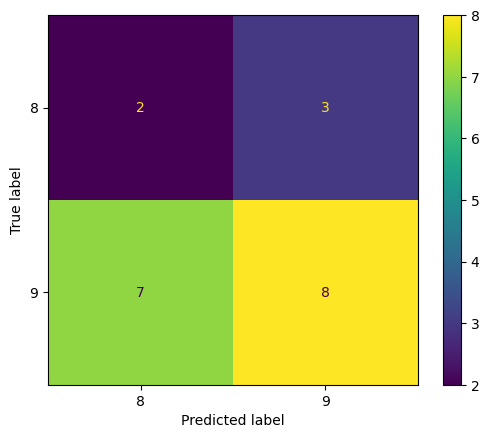

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT.classes_)
disp.plot()

[Text(0.5336538461538461, 0.9545454545454546, 'x[1] <= 0.5\ngini = 0.48\nsamples = 80\nvalue = [32, 48]'),
 Text(0.4951923076923077, 0.8636363636363636, 'x[0] <= 0.5\ngini = 0.489\nsamples = 75\nvalue = [32, 43]'),
 Text(0.5144230769230769, 0.9090909090909092, 'True  '),
 Text(0.2692307692307692, 0.7727272727272727, 'x[8] <= 0.5\ngini = 0.401\nsamples = 18\nvalue = [5, 13]'),
 Text(0.19230769230769232, 0.6818181818181818, 'x[3] <= 0.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.15384615384615385, 0.5909090909090909, 'x[4] <= 0.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.11538461538461539, 0.5, 'x[7] <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.07692307692307693, 0.4090909090909091, 'x[2] <= 0.5\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.038461538461538464, 0.3181818181818182, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.11538461538461539, 0.3181818181818182, 'x[6] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.0

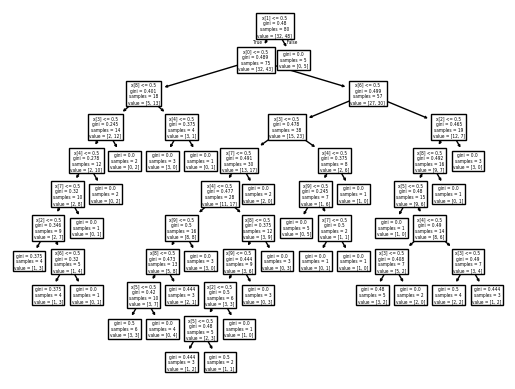

In [15]:
export_graphviz(DT, out_file='animeClassifier.dot', 
                class_names=True, 
                #class_names=['Negative', 'Positive'], 
                feature_names=X.columns,
                impurity=False,
                filled=True)
  
tree.plot_tree(DT)

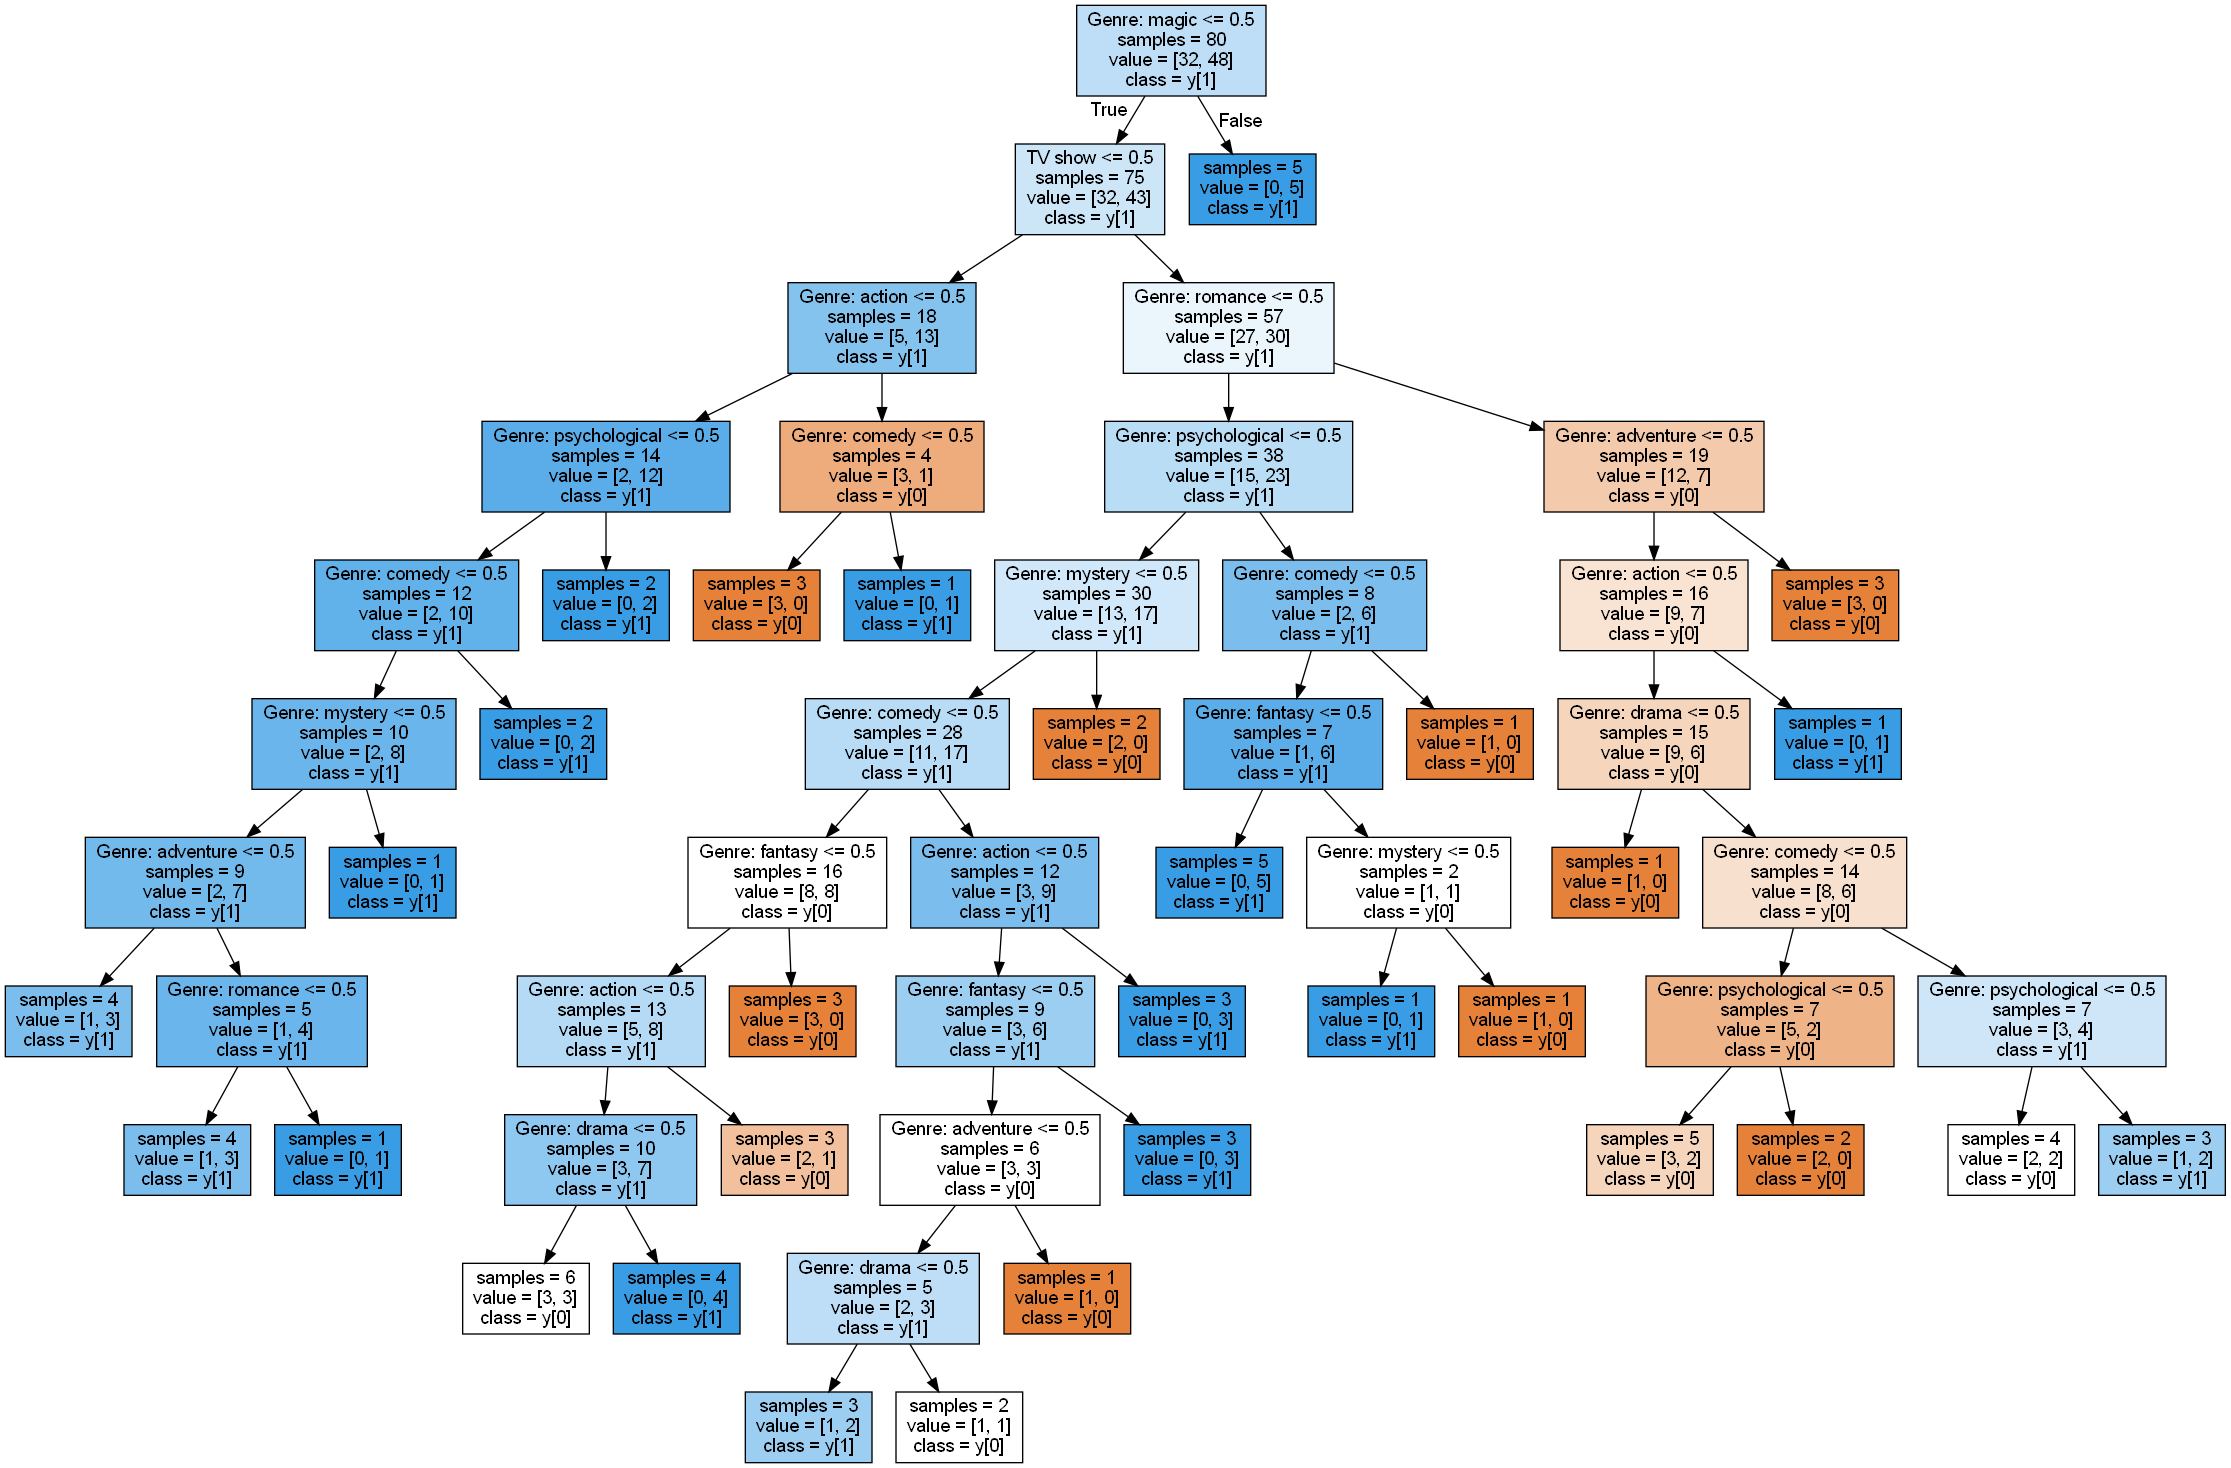

In [14]:
! dot -Tpng animeClassifier.dot -o animeClassifier.png

from IPython import display
display.Image("animeClassifier.png")

In [12]:
with open('animeClassifier.dot') as f:
    tree_graph = f.read()

graph = graphviz.Source(tree_graph)
# This render the .dot file into a PDF
graph.render("animeClassifier", view=True)

'animeClassifier.pdf'

In [17]:
criteria = ['gini', 'entropy']
for c in criteria:
    for md in range(2, 8):
        # Model intializing
        dtree = DecisionTreeClassifier(criterion=c, max_depth=md)
        
        # Model training/fitting
        dtree.fit(X_train, y_train)
               
        # Model validation/test
        y_pred = dtree.predict(X_test)
        
        print("criterion={0}, max_depth={1}:\r".format(c, md))
        print("Accuracy: {}\r\n".format(metrics.accuracy_score(y_test, y_pred)))

criterion=gini, max_depth=2:
Accuracy: 0.65

criterion=gini, max_depth=3:
Accuracy: 0.65

criterion=gini, max_depth=4:
Accuracy: 0.7

criterion=gini, max_depth=5:
Accuracy: 0.65

criterion=gini, max_depth=6:
Accuracy: 0.5

criterion=gini, max_depth=7:
Accuracy: 0.55

criterion=entropy, max_depth=2:
Accuracy: 0.65

criterion=entropy, max_depth=3:
Accuracy: 0.65

criterion=entropy, max_depth=4:
Accuracy: 0.7

criterion=entropy, max_depth=5:
Accuracy: 0.45

criterion=entropy, max_depth=6:
Accuracy: 0.55

criterion=entropy, max_depth=7:
Accuracy: 0.5



In [18]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', max_features=10, n_estimators=100, random_state=0) 
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print("Accuracy of Random Forest: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of Random Forest: 0.6


In [19]:
from sklearn.ensemble import ExtraTreesClassifier

forest2 = ExtraTreesClassifier(criterion='gini', n_estimators=10, max_depth=None,  min_samples_split=2, random_state=0)
forest2.fit(X_train, y_train)
y_pred = forest2.predict(X_test)

print("Accuracy of Extra Trees: {}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of Extra Trees: 0.7
